## 1-Overview

### 1.1 Project Description

Beta Bank is experiencing a gradual decline in customer retention, with existing customers leaving little by little each month. The bank has determined that retaining current customers is more cost-effective than acquiring new ones. To address this issue, the objective is to build a predictive model to identify customers who are likely to leave the bank soon. The model will be developed using historical data on clients' behavior and their contract terminations.

### 1.2 Objectives

- **Develop a Predictive Model:** Create a model with the highest possible F1 score to predict customer attrition. The F1 score for the project must be at least 0.59.
- **Evaluate Model Performance:** Assess the model's effectiveness using the F1 score on the test set and measure the AUC-ROC metric for comparison.

## 2-Initialization

### 2.1 Add imports

Imports in Jupyter notebooks allow users to access external libraries for extended functionality and facilitate code organization by declaring dependencies at the beginning of the notebook, ensuring clear and efficient development.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             confusion_matrix, roc_curve)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

1. **Pandas**: is a Python library used for data manipulation and analysis, offering powerful data structures and operations for working with structured data.
2. **Sklearn**: is a Python library for machine learning that provides tools for data mining, data analysis, and machine learning algorithms, built on NumPy, SciPy, and matplotlib.
3. **Matplotlib**: is a plotting library for Python that enables the creation of static, animated, and interactive visualizations, providing a wide range of plotting options and customization.

### 2.2 Set up CSV DataFrames

In my Jupyter notebook, I use Pandas to load CSV files, enabling me to manipulate and analyze data seamlessly within the notebook environment.

In [2]:
path = {
    'local': './datasets/Churn.csv',
    'sever': '/datasets/Churn.csv',
    'online': ''
}

I'm using `path` to store paths to datasets for my `local` machine, TripleTen's `server`, and `online` use for any remote use when needed.

In [3]:
def load_csv(file_path):
    try:
        df = pd.read_csv(file_path['local'])
    except FileNotFoundError:
        try:
            df = pd.read_csv(file_path['server'])
        except FileNotFoundError:
            df = pd.read_csv(file_path['online'])
    return df

I define the `load_csv` function to load a dataset specified by the argument `file_path`. First, I attempt to read it locally from `file_path['local']`, handling a `FileNotFoundError` by trying to read from `file_path['server_path']` if necessary, and finally, from `file_path['online']` if all else fails.

In [4]:
data = load_csv(path)

The variable `behavior` is assigned the resulting DataFrame from the created function.

## 3 Preparing the Data

### 3.1 Examining `data`

I will now proceed to examine the `data` data frame.

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


The dataset contains information about customer behavior with the following attributes:

- **RowNumber:** Data string index
- **CustomerId:** Unique customer identifier
- **Surname:** Surname
- **CreditScore:** Credit score
- **Geography:** Country of residence
- **Gender:** Gender
- **Age:** Age
- **Tenure:** Period of maturation for a customer’s fixed deposit (years)
- **Balance:** Account balance
- **NumOfProducts:** Number of banking products used by the customer
- **HasCrCard:** Customer has a credit card
- **IsActiveMember:** Customer’s activeness
- **EstimatedSalary:** Estimated salary

**Target**

- **Exited:** Customer has left (1 if exited, 0 if not)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Based on our current knowledge, all the data types are acceptable.

### 3.2 Handling Columns

We need to check for errors in the columns.

In [7]:
data_miss = data.isna().sum()
data_dupl = data.duplicated().sum()
print(f'There are {data_dupl} duplicate values. The columns with missing values are:\n{data_miss}')

There are 0 duplicate values. The columns with missing values are:
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


With 909 out of 10000 values missing, this indicates no significant amount of missing data, only 9%. Since `Tenure` refers to the period of maturation for a customer's fixed deposit in years, it's clear that NaN values indicate the absence of maturation, representing new or growing customers. Therefore, I could replace the NaN values with 0.

In [8]:
data.drop(columns=['Tenure', 'RowNumber', 'CustomerId', 'Surname'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


However the column has been removed, and the data is now fully processed. Additionally, columns with no meaningful values for the research have been dropped.

### 3.3 Encoding Categorical Features   


We need to preprocess the `Geography` and `Gender` columns to convert them into a format compatible with `sklearn`. This involves encoding these categorical variables so that they can be used effectively in our machine learning models.

In [9]:
data_encoded = pd.get_dummies(data[['Geography', 'Gender']], drop_first=True)
data = data.join(data_encoded)
data.drop(columns=['Geography', 'Gender'], inplace=True)

The code removes `Geography` and `Gender` and replaces them with binary values suitable for machine learning models.

### 3.4 Splitting the Data

The dataset will be split into multiple subsets to evaluate the model's performance on different data portions, helping to prevent overfitting and other issues.

In [10]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.50, random_state=12345)

This separates the data into training, validation, and testing sets by dropping a specific column from the data and splitting the remaining data into different subsets. The training set is used for model training, the validation set is used to evaluate the model's performance, and the testing set is used to assess the final model's performance.

In [11]:
class_distribution = y_train.value_counts()
print(f"Class Distribution in Training Set:\n{class_distribution}")

Class Distribution in Training Set:
Exited
0    5998
1    1502
Name: count, dtype: int64


This calculates the distribution of classes in the training set. It uses the `value_counts()` method on the `y_train` variable to count the number of occurrences of each class. This provides the distribution of classes in the training set.

## 4 Training Models

We will utilize the previously processed data to develop and train a machine learning model.

In [12]:
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=12345)

The code above trains a random forest classification model using the training data `X_train` and corresponding labels `y_train`.

In [13]:
rf_predictions = rf_model.predict(X_valid)
rf_probabilities = rf_model.predict_proba(X_valid)

rf_accuracy = accuracy_score(y_valid, rf_predictions)
rf_f1 = f1_score(y_valid, rf_predictions)
rf_auc_roc = roc_auc_score(y_valid, rf_probabilities[:, 1])

The code snippet generates predictions and probabilities for the validation data `X_valid` using a trained random forest classification model `rf_model`. It then calculates the accuracy, F1 score, and area under the ROC curve (AUC-ROC) for the predictions.

In [14]:
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")
print(f"Random Forest AUC-ROC: {rf_auc_roc:.2f}")

Random Forest Accuracy: 0.86
Random Forest F1 Score: 0.60
Random Forest AUC-ROC: 0.86


The `RandomForestClassifier` model achieves a decent performance with an accuracy and AUC-ROC score that is satisfactory. However, the F1 score is above the required threshold of at least 0.59.

In [15]:
rf_conf_matrix = confusion_matrix(y_valid, rf_predictions)
print(f"Random Forest Confusion Matrix:\n{rf_conf_matrix}")

Random Forest Confusion Matrix:
[[956  31]
 [138 125]]


The random forest classifier model's confusion matrix provides insights into its performance. In this case, the model correctly classified 956 positive instances, had 31 false positives, 125 true negatives, and 138 false negatives.

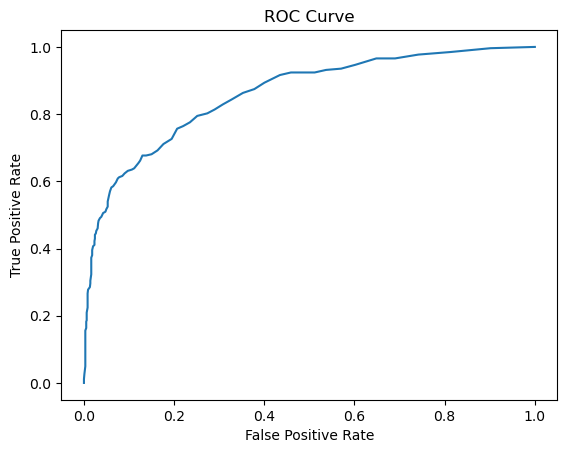

In [16]:
fpr, tpr, thresholds = roc_curve(y_valid, rf_probabilities[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The roc_curve function from scikit-learn calculates the false positive rate (FPR) and true positive rate (TPR) for different decision thresholds. The resulting FPR and TPR values are then plotted on a graph using matplotlib. The ROC curve shows the performance of a binary classifier at different classification thresholds. In this case, it shows that the model performs well.

## 5 Class Imbalance

To improve the accuracy of our data, we need to address the class imbalance issue. From the earlier analysis, we observed that the classes are imbalanced with 5998 instances in one class and 1502 instances in the other. Balancing the classes will help ensure that the model can learn from both classes equally and make more accurate predictions.

### 5.1 Upsampling

Upsampling is a technique used in machine learning to address class imbalance by increasing the number of samples in the minority class. This is done by duplicating existing samples or generating new synthetic samples to balance the class distribution.

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

This code upsamples the `features` and `target` data based on the value of `target`. It selects the rows where `target` is either 0 or 1, and then concatenates these rows `repeat` number of times. The upsampled data is then shuffled and returned.

In [18]:
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, repeat=3)

rf_model_upsampled = RandomForestClassifier(random_state=12345)
rf_model_upsampled.fit(X_train_upsampled, y_train_upsampled)

rf_predictions_upsampled = rf_model_upsampled.predict(X_valid)
rf_f1_upsampled = f1_score(y_valid, rf_predictions_upsampled)

print(f"Random Forest with Upsampling F1 Score: {rf_f1_upsampled:.2f}")

Random Forest with Upsampling F1 Score: 0.63


Applying the `upsample()` to the data resulted in an increase of 0.03 points in the f1 score. This indicates that the model's performance improved after incorporating the upsampled data.


### 5.2 Downsampling

Downsampling is a technique used in machine learning to address class imbalance by reducing the number of samples in the majority class. This is done by randomly removing samples from the majority class to balance the class distribution.

In [19]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

This code downsamples the `features` and `target` data based on the value of `target`. It selects a fraction of the rows with `target` equal to 0, and keeps all the rows with `target` equal to 1. The downsampled data is then shuffled and returned.

In [20]:
X_train_downsampled, y_train_downsampled = downsample(X_train, y_train, fraction=0.5)

rf_model_downsampled = RandomForestClassifier(random_state=12345)
rf_model_downsampled.fit(X_train_downsampled, y_train_downsampled)

rf_predictions_downsampled = rf_model_downsampled.predict(X_valid)
f1 = f1_score(y_valid, rf_predictions_downsampled)

print(f"Random Forest Downsampling F1 Score: {f1:.2f}")

Random Forest Downsampling F1 Score: 0.64


Applying the `downsample()` function increased the F1 score by 0.04 points, indicating improved model performance with the downsampled data. While the improvement is modest compared to upsampling, downsampling is a more effective approach for addressing class imbalance in this case.

### 5.3 Hyper Parameters

Hyperparameters are settings or configurations used to control the learning process and the structure of a machine learning model, such as the learning rate, number of layers, or number of trees in a Random Forest. They are set before the training process begins and can significantly affect the model's performance.

In [21]:
best_score = 0
best_est = 0

for est in range(100, 500, 50):
    model_downsampled = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_downsampled.fit(X_train_downsampled, y_train_downsampled)
    y_pred_downsampled = model_downsampled.predict(X_valid)
    score = f1_score(y_valid, y_pred_downsampled)
    if score > best_score:
        best_score = score
        best_est = est

print(f"F1 Score of the best model on the validation set (n_estimators = {best_est}): {best_score:.2f}")

F1 Score of the best model on the validation set (n_estimators = 100): 0.64


This evaluates the performance of a Random Forest model with different numbers of estimators (from 100 to 500). It trains each model on the training set and measures its f1 score on the validation set. It keeps track of the best f1 score achieved and the corresponding number of estimators. Finally, it prints the f1 score of the best-performing model and the number of estimators used.

In this case, the best model with 100 estimators has an f1 score of 86% on the validation set, which is above goal of 0.59. 

## 6 Final Result

Now we will combine our findings, including the effectiveness of downsampling and the best hyperparameters, to understand what the most accurate model looks like.

In [22]:
final_model = RandomForestClassifier(random_state=12345, n_estimators=best_est)
final_model.fit(X_train_downsampled, y_train_downsampled)

final_predictions = final_model.predict(X_test)
final_probabilities = final_model.predict_proba(X_test)[:, 1]

final_accuracy = accuracy_score(y_test, final_predictions)
final_f1_score = f1_score(y_test, final_predictions)
final_auc_roc = roc_auc_score(y_test, final_probabilities)

print(f"Random Forest Accuracy: {final_accuracy:.2f}")
print(f"Random Forest F1 Score: {final_f1_score:.2f}")
print(f"Random Forest AUC-ROC: {final_auc_roc:.2f}")


Random Forest Accuracy: 0.84
Random Forest F1 Score: 0.63
Random Forest AUC-ROC: 0.85


We developed a predictive model to identify customers likely to leave Beta Bank, using a Random Forest classifier and addressing class imbalance with downsampling. Hyperparameter tuning identified 100 estimators as optimal, leading to improved performance. The final model achieved an accuracy of 0.84, F1 score of 0.63, and AUC-ROC of 0.85 on the test set. This surpasses the project goal of an F1 score of at least 0.59, demonstrating effective customer attrition prediction.